In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr

In [4]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [5]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [6]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

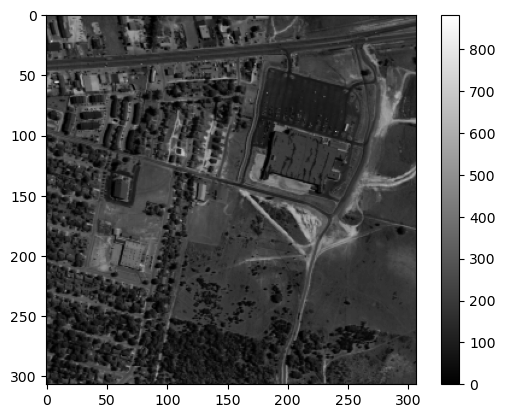

In [7]:
plt.imshow(X3d[100, :, :], cmap='gray')
plt.colorbar()

## Small scale test

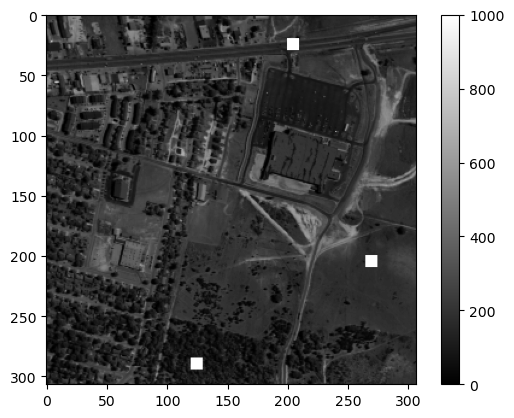

In [8]:
img = X3d[100, :, :].copy()
img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[20: 30, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [9]:
trees3d = X3d[:, 285: 295, 120: 130] # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275] # (162, 10, 10)
asphalt3d = X3d[:, 20: 30, 200: 210] # (162, 10, 10)

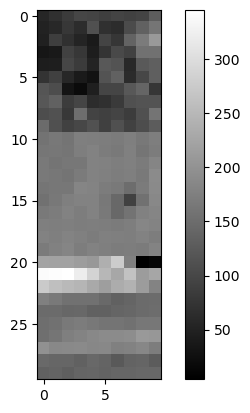

In [10]:
smallX3d = np.hstack([trees3d, grass3d, asphalt3d]) # (162, 30, 10)
plt.imshow(smallX3d[100, :, :], cmap='gray')
plt.colorbar()

In [11]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 300)

In [17]:
r = 6
iterations = 1000
_lambda = 0.4

In [18]:
m, n = smallX.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))
Wb, Hb, Wl, Hl, fscores, gscores = nmf(smallX, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

Iteration: 1, f=8992.905924206836, g=890.4067640166152,  total=9349.068629813482
Iteration: 2, f=5175.747690090048, g=917.1722052531218,  total=5542.616572191297
Iteration: 3, f=2879.9413520974304, g=885.7014982726805,  total=3234.2219514065027
Iteration: 4, f=1949.7903465368415, g=864.5639569655565,  total=2295.615929323064
Iteration: 5, f=1607.4823019867015, g=847.4033773146189,  total=1946.4436529125492
Iteration: 6, f=1424.4035800374606, g=833.9826695788317,  total=1757.9966478689935
Iteration: 7, f=1288.8645945730455, g=823.5248975006309,  total=1618.274553573298
Iteration: 8, f=1183.1331600696287, g=813.810488785577,  total=1508.6573555838595
Iteration: 9, f=1102.5933792036603, g=804.3093046486304,  total=1424.3171010631124
Iteration: 10, f=1041.0736392916658, g=795.4124839282783,  total=1359.2386328629773
Iteration: 11, f=993.1113709784121, g=787.2079445892525,  total=1307.9945488141132
Iteration: 12, f=954.9225109175602, g=779.664309025125,  total=1266.7882345276103
Iteration: 

In [19]:
with open(f'mod_small_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

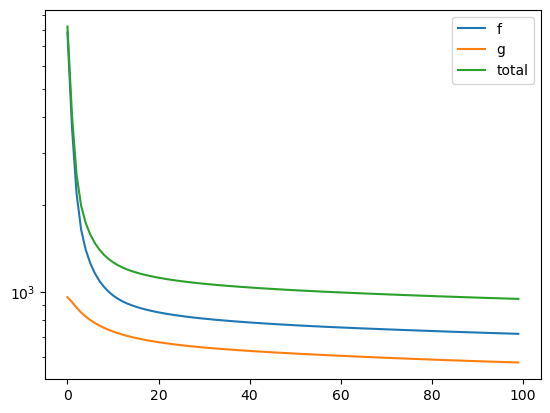

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [15]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.39455688 0.32773336 0.081952   0.09395034 0.10180741]
[0.18110637 0.         0.24683285 0.16684083 0.19978892 0.20543103]
[0.18623622 0.30557818 0.         0.19360739 0.17406931 0.14050891]
[0.07654591 0.33950068 0.31822982 0.         0.12906908 0.13665451]
[0.08595472 0.39821598 0.28025289 0.12642448 0.         0.10915192]
[0.09584285 0.42132991 0.23277734 0.13773423 0.11231567 0.        ]


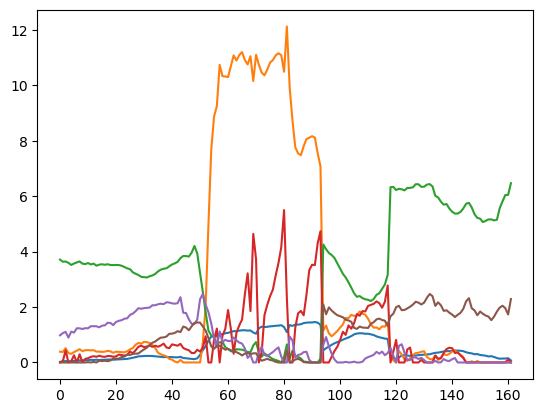

In [16]:
plt.plot(W_ins)

In [18]:
# plt.imshow(Hl[0, :].reshape(30, 10, order='F'), cmap='gray')
# plt.colorbar()

In [19]:
# plt.imshow(Hl[1, :].reshape(30, 10, order='F'), cmap='gray')
# plt.colorbar()

## Medium scale test, expected r = 3

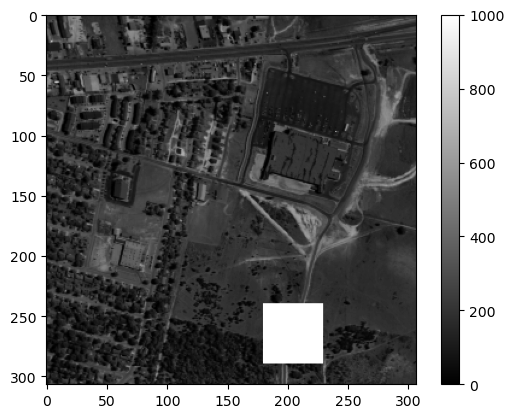

In [20]:
img = X3d[100, :, :].copy()
img[240: 290, 180: 230] = 1000 # trees
plt.imshow(img, cmap='gray')
plt.colorbar()

In [21]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
medX = medX3d.reshape(m, -1, order='F') # (162, 2500)

In [22]:
r = 8
iterations = 1000
_lambda = 0.4

In [23]:
m, n = medX.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))
Wb, Hb, Wl, Hl, fscores, gscores = nmf(medX, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

Iteration: 1, f=22147.930072599804, g=5888.619291978168,  total=24503.37778939107
Iteration: 2, f=10092.329451102489, g=5075.940882222457,  total=12122.705803991472
Iteration: 3, f=6339.322815769288, g=4518.812167081529,  total=8146.8476826019
Iteration: 4, f=5175.521725230845, g=4130.15900266142,  total=6827.585326295413
Iteration: 5, f=4396.545976655723, g=3857.469560974208,  total=5939.533801045407
Iteration: 6, f=3819.772655326704, g=3631.377554812255,  total=5272.323677251606
Iteration: 7, f=3453.0049257471505, g=3443.284565364413,  total=4830.318751892915
Iteration: 8, f=3230.146915761446, g=3294.0595470258445,  total=4547.7707345717845
Iteration: 9, f=3080.420330589217, g=3175.323867567509,  total=4350.54987761622
Iteration: 10, f=2969.0235265307883, g=3078.8960335171637,  total=4200.581939937654
Iteration: 11, f=2880.4189130330615, g=2998.7758490278443,  total=4079.9292526441996
Iteration: 12, f=2806.307945034988, g=2931.6337285820837,  total=3978.9614364678214
Iteration: 13, f

In [24]:
with open(f'med_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

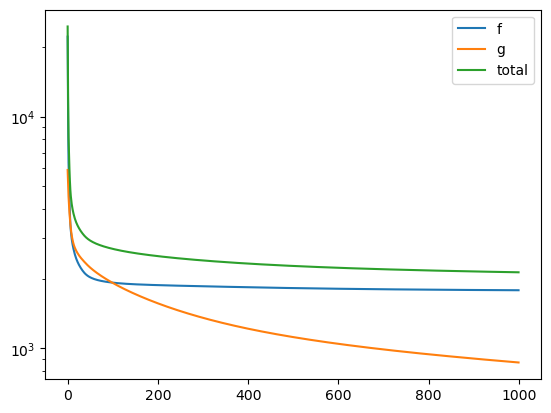

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [26]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.17650873 0.33211909 0.19926199 0.03010811 0.14150982
 0.04997307 0.0705192 ]
[0.11868816 0.         0.23649769 0.1707552  0.11829999 0.12597625
 0.12237985 0.10740285]
[0.14239504 0.15079492 0.         0.17652992 0.14764653 0.10357062
 0.14797086 0.13109211]
[0.11065364 0.14101781 0.22864332 0.         0.10413614 0.15142327
 0.13074439 0.13338143]
[0.02874014 0.16793793 0.32872104 0.17900516 0.         0.14792713
 0.06064252 0.08702607]
[0.11207612 0.14837953 0.19132075 0.21596229 0.12273518 0.
 0.11159765 0.09792847]
[0.04528274 0.16491696 0.31273162 0.21334302 0.05756633 0.12768066
 0.         0.07847866]
[0.06544018 0.14822167 0.2837348  0.22289034 0.08460211 0.11474125
 0.08036965 0.        ]


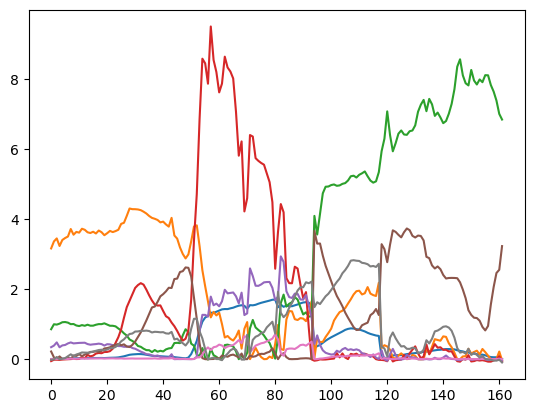

In [27]:
plt.plot(W_ins)

In [28]:
# plt.imshow(Hl[1, :].reshape(50, 50, order='F'), cmap='gray')
# plt.colorbar()

## Full size test

In [ ]:
r = 16
iterations = 500
_lambda = 0.4

In [ ]:
m,n = X.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))


Wb, Hb, Wl, Hl, fscores, gscores = nmf(X, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

In [ ]:
with open(f'full_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

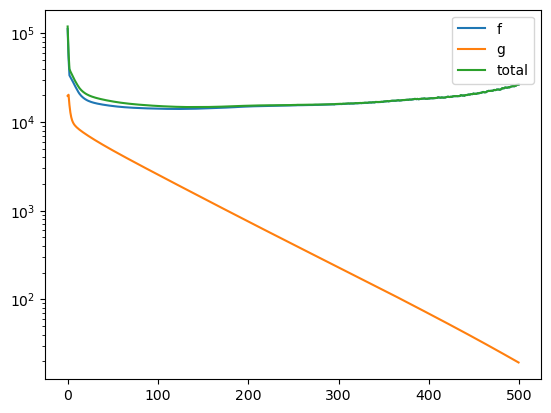

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [12]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.01559146 0.11897984 0.09892845 0.09812184 0.11220445
 0.48457592 0.00339972 0.00391012 0.00385272 0.00395652 0.00387245
 0.00390321 0.04092506 0.00396035 0.00381788]
[0.01421215 0.         0.10680334 0.09139239 0.07811169 0.09667243
 0.44150479 0.01609018 0.0165574  0.01652527 0.01661592 0.01655367
 0.01655034 0.0393454  0.01659408 0.01647095]
[0.05672244 0.05585906 0.         0.04494216 0.05866861 0.07970064
 0.19313965 0.0579829  0.05814334 0.05811705 0.05814897 0.05812646
 0.05815052 0.04601036 0.05816247 0.05812537]
[0.05346194 0.05418272 0.05094434 0.         0.0748073  0.07949241
 0.21362559 0.05468058 0.05483412 0.0548215  0.05485115 0.0548192
 0.05482671 0.03497793 0.05486293 0.05481157]
[0.04930208 0.04305691 0.0618335  0.06955366 0.         0.07482953
 0.24481831 0.05034218 0.05054243 0.05050959 0.05055938 0.05051843
 0.05053853 0.05254846 0.0505448  0.05050223]
[0.05104736 0.04824953 0.07605774 0.06692145 0.06775427 0.
 0.22389396 0.05149489 0.05165423 0.051660

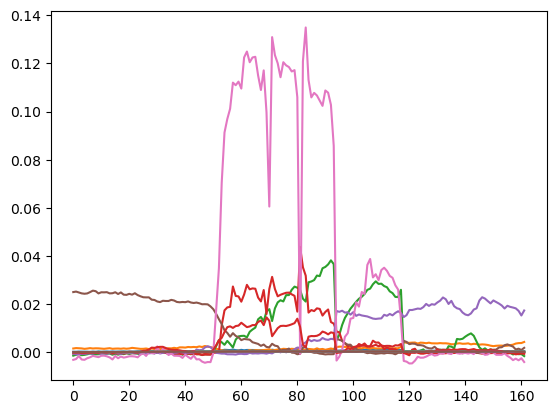

In [13]:
plt.plot(W_ins)